In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [3]:
df2 = df.copy()
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


# EDA

In [4]:
len(df)

2011

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [6]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [10]:
print(df.Date.min())
print(df.Date.max())

2012-01-03
2019-12-30


In [11]:
holidays = []
holidays.append(list(pd.date_range(
  start="2012-01-03'", end="2019-12-30").difference(df.Date)))

In [12]:
holidays

[[Timestamp('2012-01-07 00:00:00'),
  Timestamp('2012-01-08 00:00:00'),
  Timestamp('2012-01-14 00:00:00'),
  Timestamp('2012-01-15 00:00:00'),
  Timestamp('2012-01-16 00:00:00'),
  Timestamp('2012-01-21 00:00:00'),
  Timestamp('2012-01-22 00:00:00'),
  Timestamp('2012-01-28 00:00:00'),
  Timestamp('2012-01-29 00:00:00'),
  Timestamp('2012-02-04 00:00:00'),
  Timestamp('2012-02-05 00:00:00'),
  Timestamp('2012-02-11 00:00:00'),
  Timestamp('2012-02-12 00:00:00'),
  Timestamp('2012-02-18 00:00:00'),
  Timestamp('2012-02-19 00:00:00'),
  Timestamp('2012-02-20 00:00:00'),
  Timestamp('2012-02-25 00:00:00'),
  Timestamp('2012-02-26 00:00:00'),
  Timestamp('2012-03-03 00:00:00'),
  Timestamp('2012-03-04 00:00:00'),
  Timestamp('2012-03-10 00:00:00'),
  Timestamp('2012-03-11 00:00:00'),
  Timestamp('2012-03-17 00:00:00'),
  Timestamp('2012-03-18 00:00:00'),
  Timestamp('2012-03-24 00:00:00'),
  Timestamp('2012-03-25 00:00:00'),
  Timestamp('2012-03-31 00:00:00'),
  Timestamp('2012-04-01 00:0

In [13]:
for i in holidays:
    print(len(i))

908


C:\Users\91734\AppData\Local\Temp\ipykernel_17360\1801191398.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


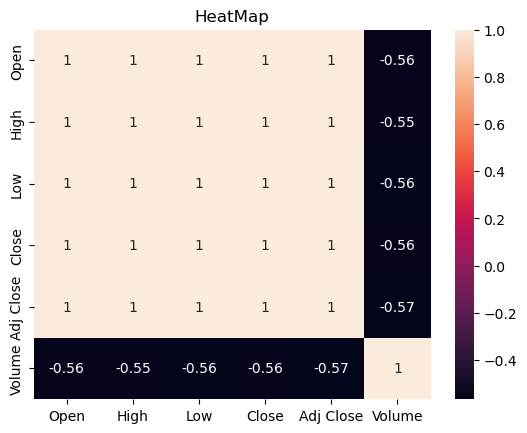

In [14]:
sns.heatmap(df.corr(),annot=True)
plt.title('HeatMap')
plt.show()

we select close as the target variable

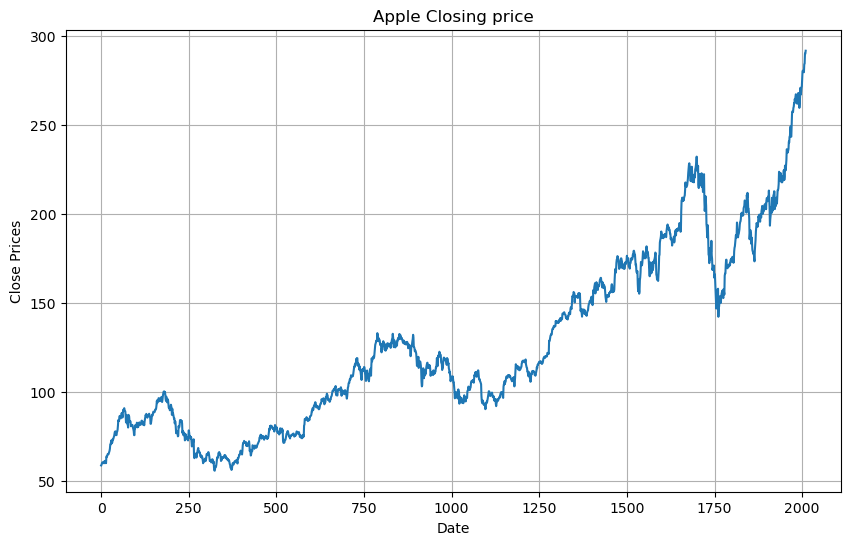

In [15]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('Apple Closing price')
plt.show()

overall trend is upward

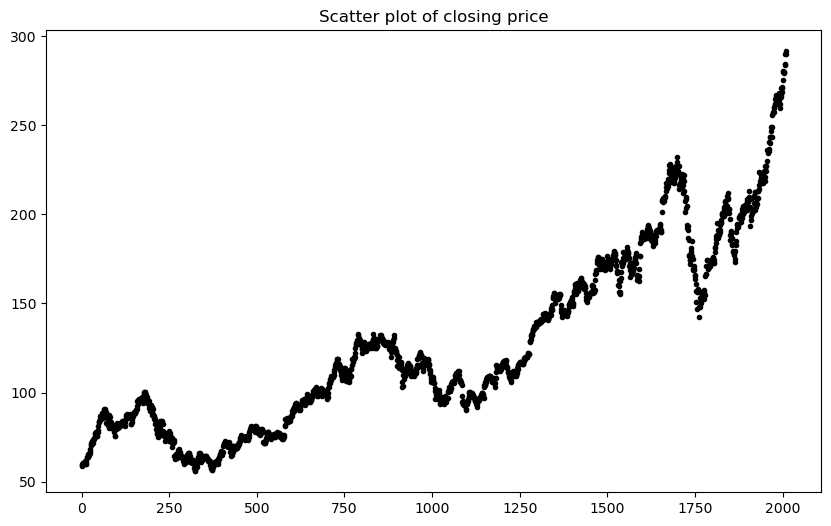

In [16]:
#scatterplot close price:
plt.figure(figsize=(10,6))
df_close = df['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

checking for trend using scatter plot

C:\Users\91734\AppData\Local\Temp\ipykernel_17360\2839019225.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close']).set_title("Distribution Plot of Close Price")


Text(0.5, 1.0, 'Distribution Plot of Close Price')

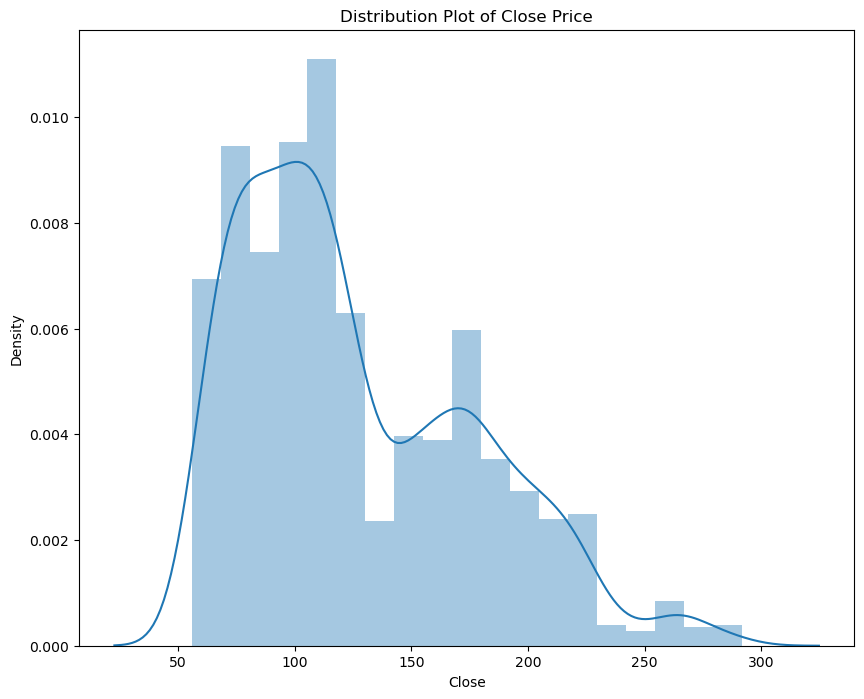

In [17]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df['Close']).set_title("Distribution Plot of Close Price")

Distribution shows right skew

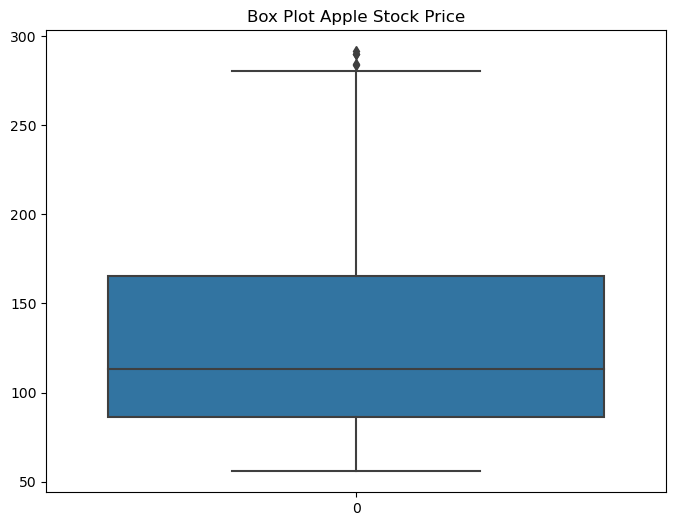

In [18]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(df['Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')

outliers are present

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [20]:
daily_data = pd.DataFrame(df['Close'])
daily_data

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2019-12-23,284.000000
2019-12-24,284.269989
2019-12-26,289.910004


In [21]:
import pandas as pd
daily_data['Year'] = daily_data.index.year
daily_data['Month'] = daily_data.index.strftime('%B')
daily_data['day_of_week'] =  daily_data.index.strftime('%A')
daily_data['quarter'] = daily_data.index.quarter
daily_data

,Close,Year,Month,day_of_week,quarter
Date,,,,,
2012-01-03,58.747143,2012,January,Tuesday,1
2012-01-04,59.062859,2012,January,Wednesday,1
2012-01-05,59.718571,2012,January,Thursday,1
2012-01-06,60.342857,2012,January,Friday,1
2012-01-09,60.247143,2012,January,Monday,1
...,...,...,...,...,...
2019-12-23,284.000000,2019,December,Monday,4
2019-12-24,284.269989,2019,December,Tuesday,4
2019-12-26,289.910004,2019,December,Thursday,4


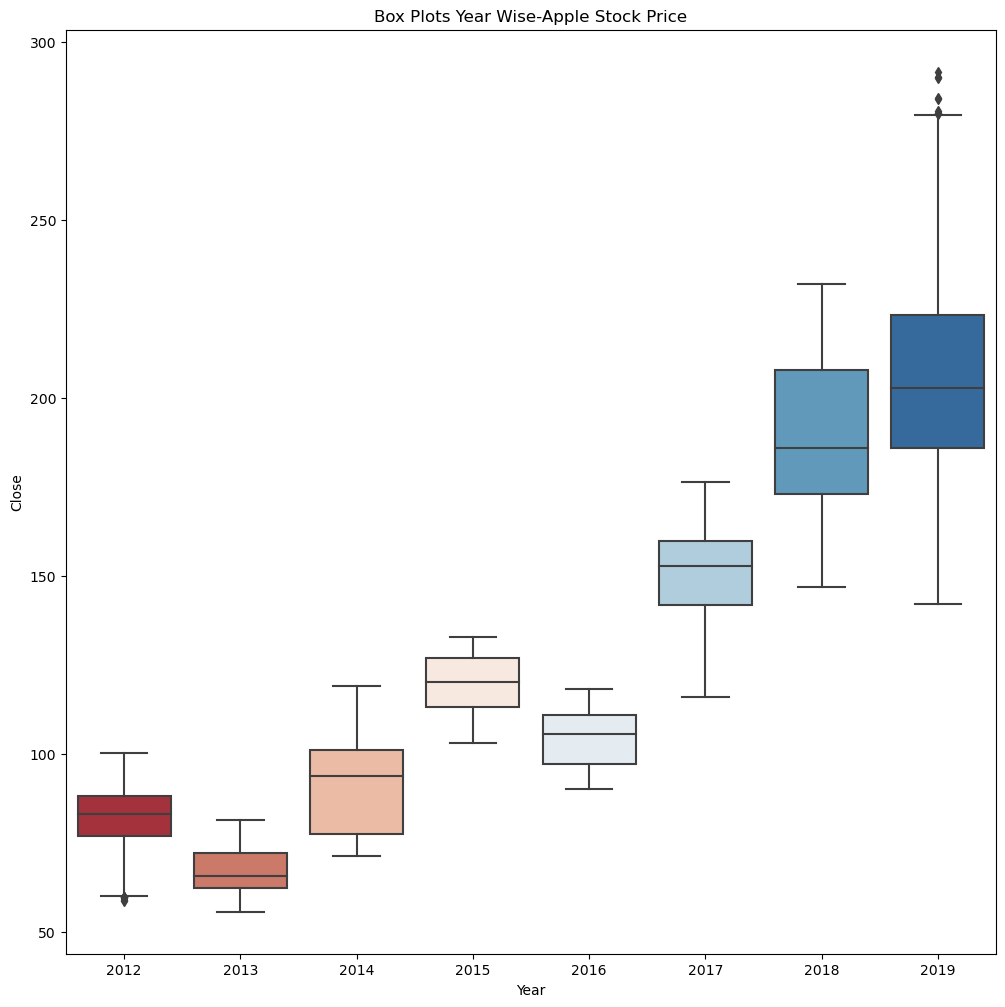

In [22]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=daily_data['Year'],y=daily_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

outliers are present in the year 2012 and 2019


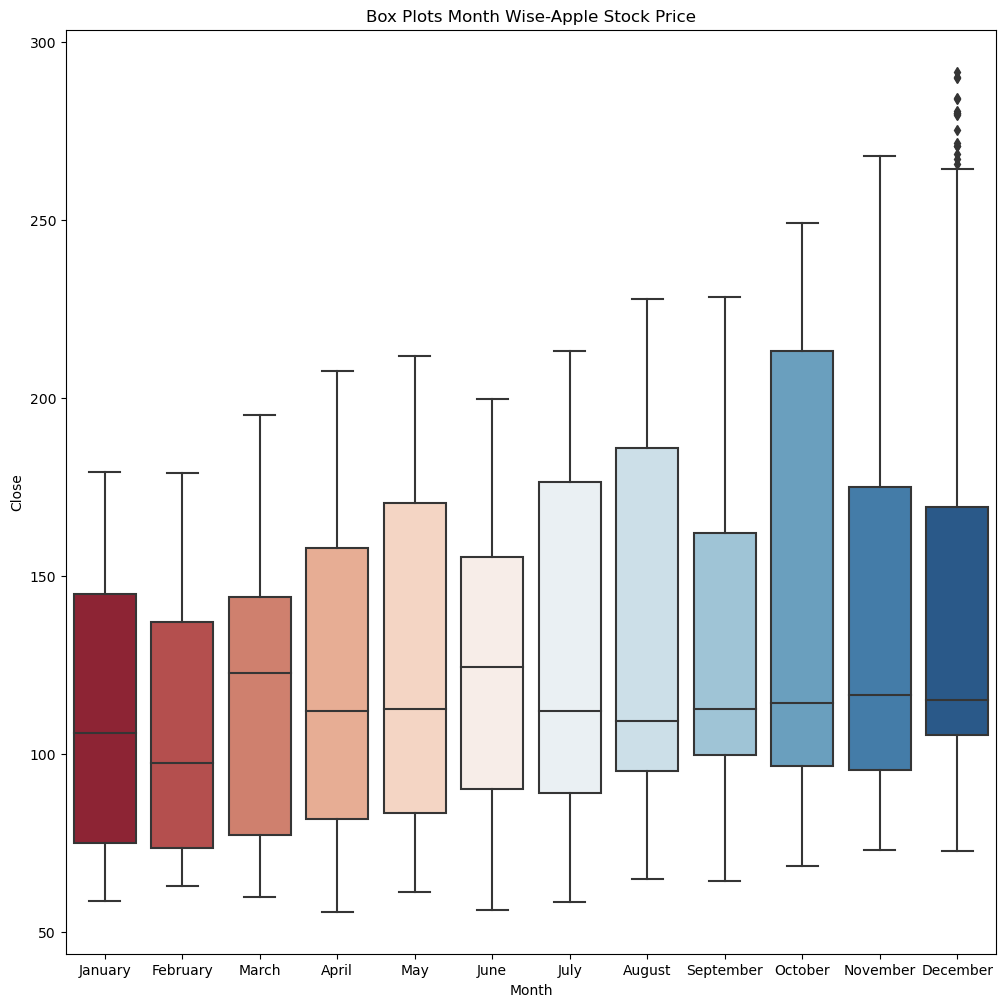

In [23]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=daily_data['Month'],y=daily_data['Close'],palette='RdBu')
ax.set_title('Box Plots Month Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

outliers are seen in the month of december

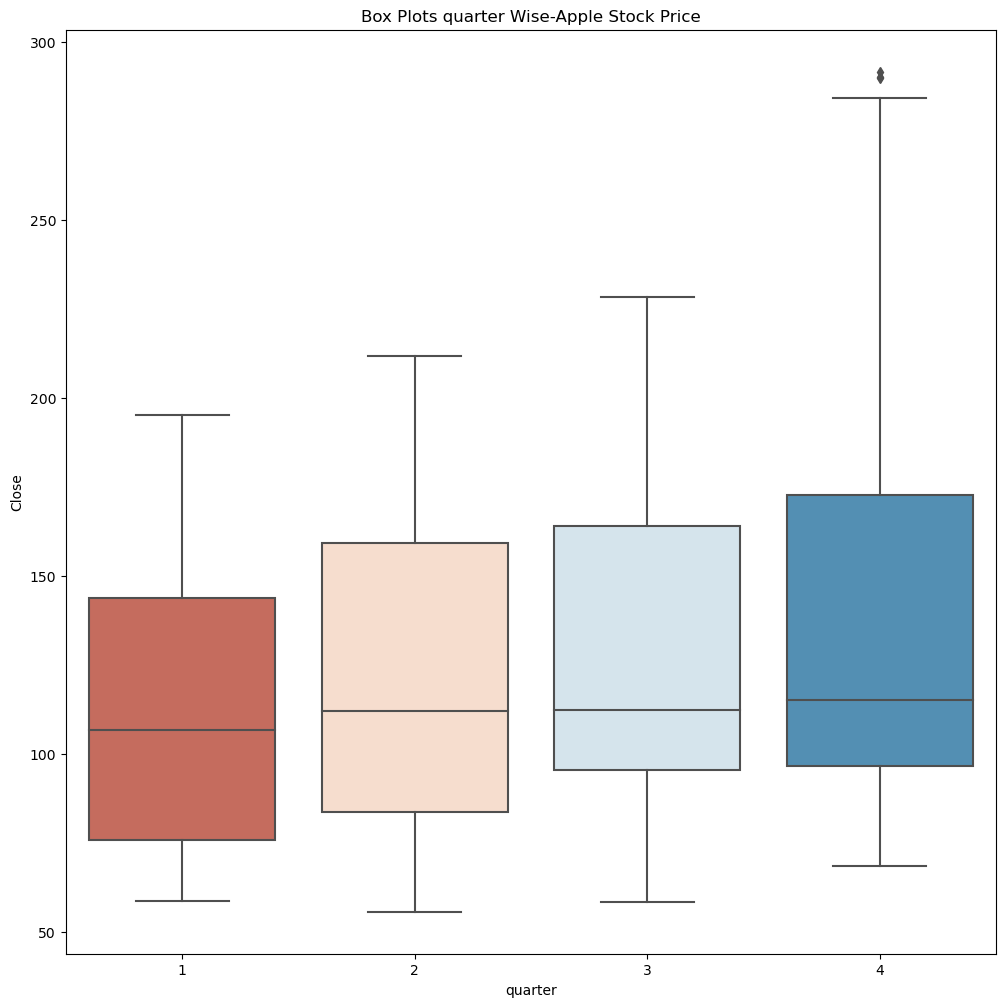

In [24]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=daily_data['quarter'],y=daily_data['Close'],palette='RdBu')
ax.set_title('Box Plots quarter Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

outliers are in 4th quarter

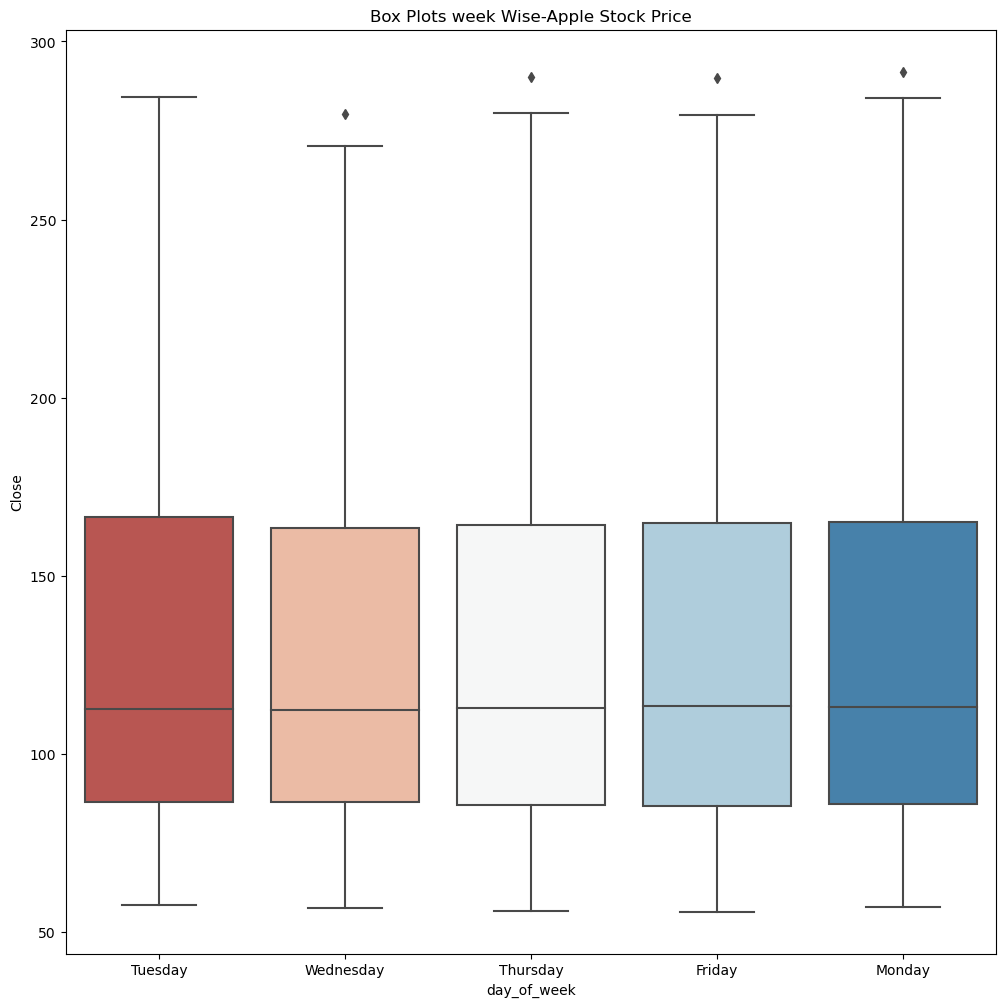

In [25]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=daily_data['day_of_week'],y=daily_data['Close'],palette='RdBu')
ax.set_title('Box Plots week Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

outliers can be seen everyday excpet for tuesday

In [26]:
features = daily_data.columns[1:]
features


Index(['Year', 'Month', 'day_of_week', 'quarter'], dtype='object')

0
Year
1
Month
2
day_of_week
3
quarter


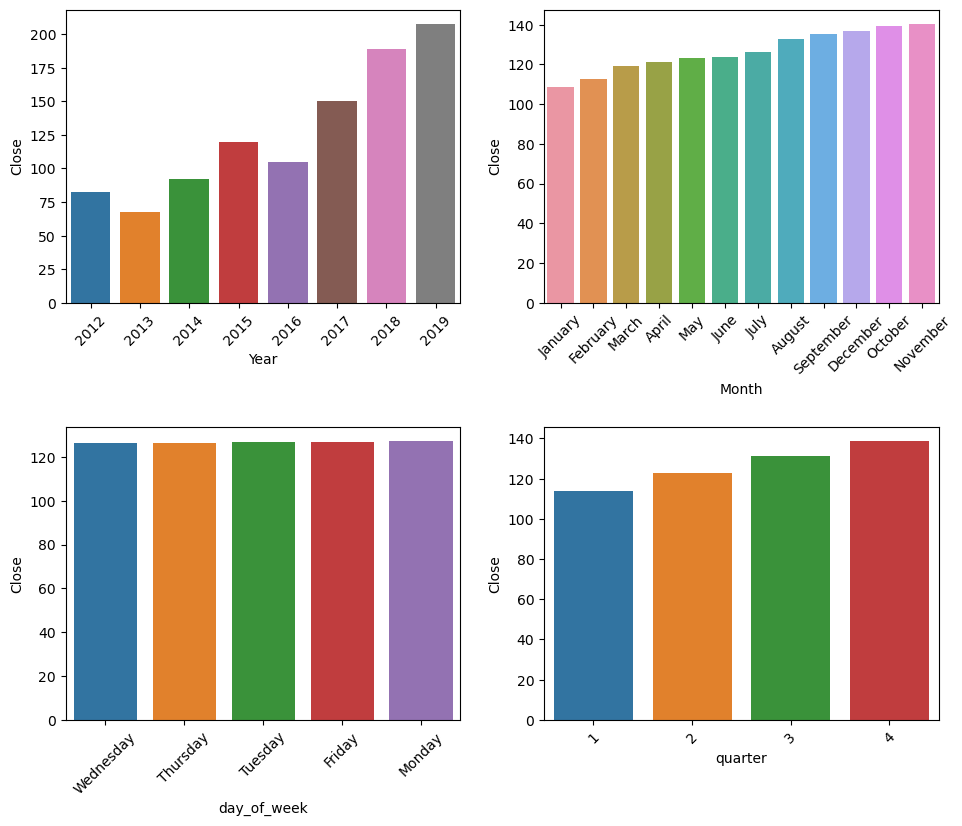

In [27]:
fig = plt.figure(figsize=(10,16))

for enum,i in enumerate(features):
    print(enum)
    print(i)
    sub_plot = fig.add_subplot(4,2,enum+1) 
    Aggregated = pd.DataFrame(daily_data.groupby(i)["Close"].mean()).reset_index().sort_values('Close')
    sns.barplot(data=Aggregated,x=str(i),y="Close",ax=sub_plot) 
    ax.set(xlabel=str(i), ylabel='Mean of Close')
    ax.set_title("Mean of stocks By {}".format(i),fontsize=20)
    plt.xticks(rotation=45) 
plt.tight_layout(pad=2) 


According to Mean price by Years, there is a constant increase in stock price from 2017.

The Average Price increases in the last 6 months of the year.

Q4 is the best for Apple according to average stock price. By sales figures Q4 has always been strong for Apple since the new product cycle takes place and its the Holiday period. We also observe this as a seasonal effect for Apple.

# Decomposition of Time Series

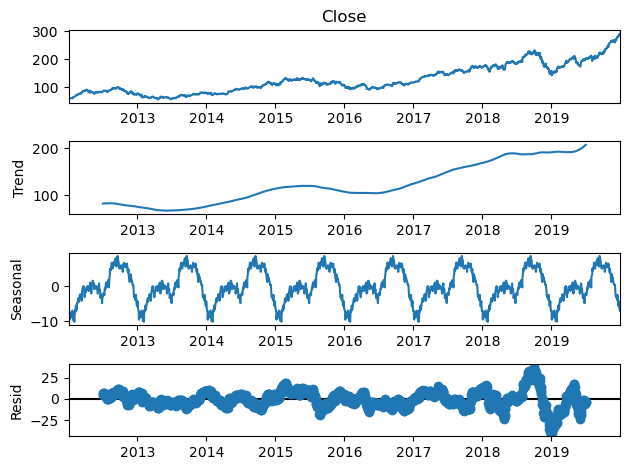

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd
decomposed_series = sd(daily_data['Close'],model='additive',period = 251)
decomposed_series.plot()
plt.show()

there is trend and seasonality thus conforms it is non stationary

# Stationarity

Time Series is Stationary if we have constant mean,constant variance and No Trend and Seasonality.

In [30]:
from statsmodels.tsa.stattools import adfuller
def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')


In [31]:
ad_fuller_func(daily_data['Close'])

ADF Statistic: 1.219370
p-value: 0.996117
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho-Time Series is Non-Stationary


AutoCorrelation Function(ACF)


Text(0.5, 0, 'Lags')

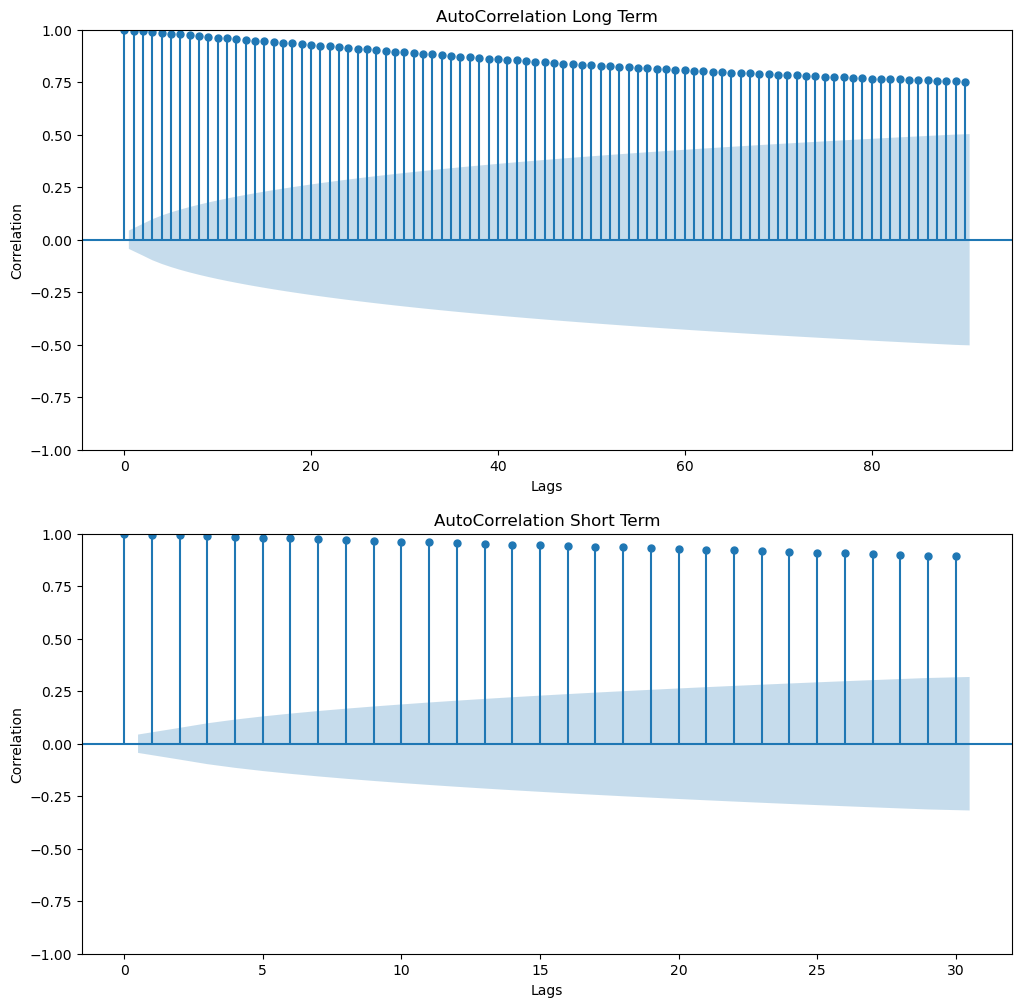

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(daily_data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(daily_data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Interpreting ACF Plot :-

->Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .

->Also tells us series is Non-stationary

->It indicates a MA(1) process



C:\Users\91734\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


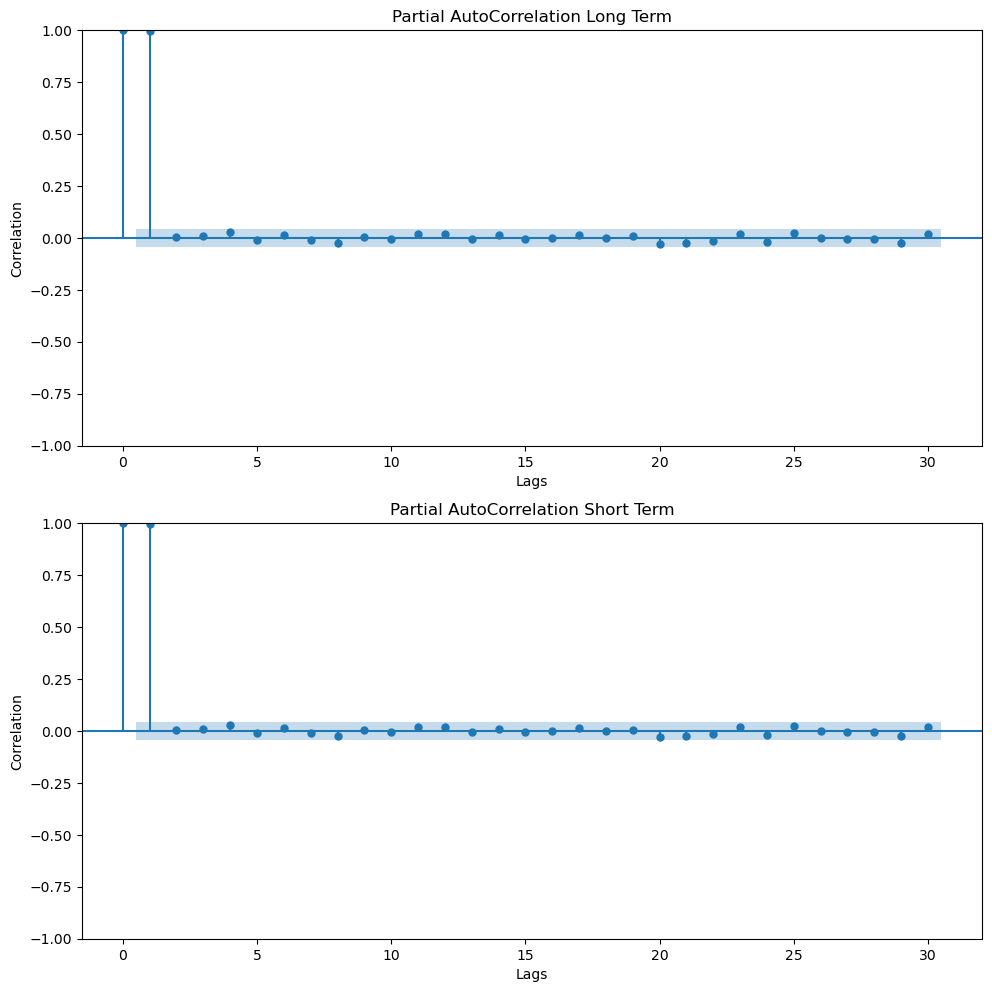

In [33]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(daily_data['Close'],lags=30,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(daily_data['Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

Transformations To Make Series Stationary

In [34]:
monthly_diff = daily_data['Close'] - daily_data['Close'].shift(1)

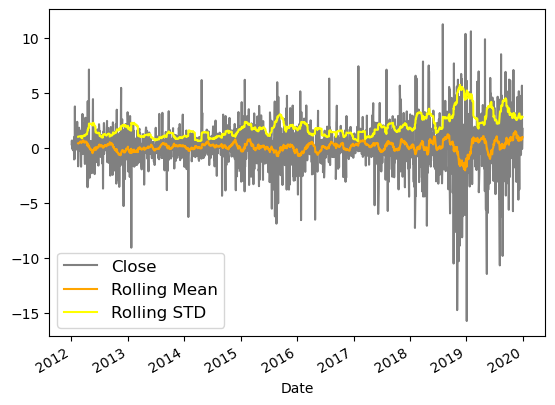

In [35]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(30).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(30).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

In [36]:
monthly_diff.isna().sum()
monthly_diff.dropna()
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -13.625534
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Null Hypothesis(Ho)-Time Series is Stationary


C:\Users\91734\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


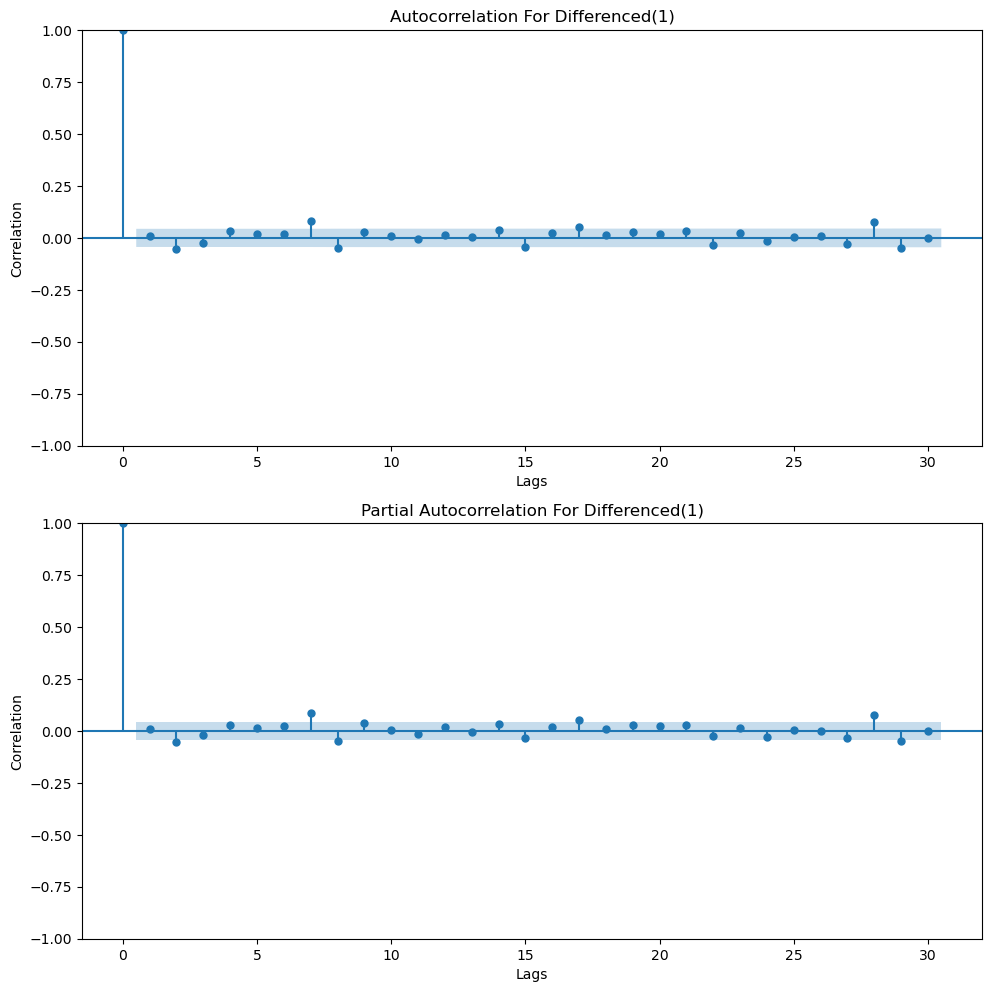

In [37]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

According to the ACF and PACF we can confirm that Differencing once has transformed series into Stationary, therefore D=1

To find p

Only one lag is significantly out of limit so p=1

Here we can see that 1 of the lags is out of the significance limit so we can say that the optimal value of our q (MA) is 1. 

MODEL METHODS

## **ARIMA**

In [38]:
train = df.loc[df.index.year < 2019, "Close"]
test = df.loc[df.index.year == 2019, "Close"]

In [39]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model on the training data
model = ARIMA(train, order=(1,1,1)).fit()

# Print the model summary
print(model.summary())

# Make predictions on the test data using the fitted model
predictions = model.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Calculate the root mean squared error (RMSE) of the predictions
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test, predictions, squared=False)
print('RMSE:', rmse)

C:\Users\91734\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91734\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91734\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1760
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3639.827
Date:                Tue, 11 Apr 2023   AIC                           7285.653
Time:                        11:24:19   BIC                           7302.071
Sample:                             0   HQIC                          7291.721
                               - 1760                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8059      0.114     -7.054      0.000      -1.030      -0.582
ma.L1          0.8336      0.106      7.845      0.000       0.625       1.042
sigma2         3.6716      0.062     59.644      0.0

C:\Users\91734\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE: 60.72690811402847


In [40]:
predictions

1760    157.625330
1761    157.717745
1762    157.643269
1763    157.703288
1764    157.654919
           ...    
2006    157.676504
2007    157.676504
2008    157.676504
2009    157.676504
2010    157.676504
Name: predicted_mean, Length: 251, dtype: float64

In [41]:
import numpy as np

In [42]:
predictions_array = np.array(predictions.values)

In [43]:
comp = pd.DataFrame()
comp['test'] = test
comp['Forecast'] = predictions_array
comp

,test,Forecast
Date,,
2019-01-02,157.919998,157.625330
2019-01-03,142.190002,157.717745
2019-01-04,148.259995,157.643269
2019-01-07,147.929993,157.703288
2019-01-08,150.750000,157.654919
...,...,...
2019-12-23,284.000000,157.676504
2019-12-24,284.269989,157.676504
2019-12-26,289.910004,157.676504


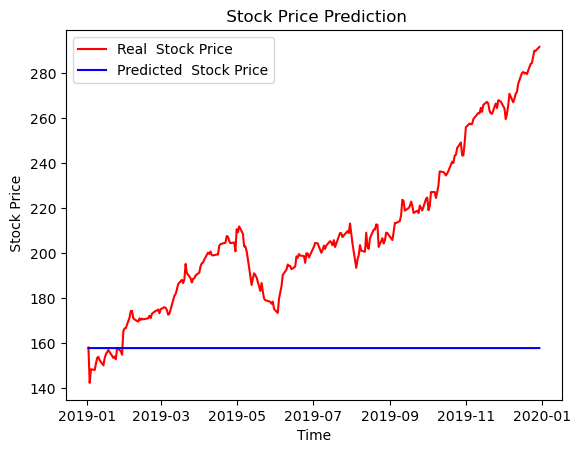

In [44]:
plt.plot(comp['test'], color = 'red', label = 'Real  Stock Price')
plt.plot(comp['Forecast'], color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# SARIMA

In [ ]:
train = df.loc[df.index.year < 2019, "Close"]
test = df.loc[df.index.year == 2019, "Close"]

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train.values,order=(1, 1, 1),seasonal_order=(1,1,1,251))
results=model.fit()

In [ ]:
forecast = results.forecast(steps=30)

In [ ]:
forecast

array([158.28373799, 158.03060414, 158.13320392, 159.11766755,
       159.09010932, 159.45015335, 159.4034295 , 159.57604248,
       159.40833834, 159.68927728, 160.78747431, 160.57369251,
       161.28667488, 160.65077373, 159.94905336, 159.13538354,
       158.71584422, 159.19838611, 157.97894096, 157.47772575,
       160.11893434, 160.34324039, 157.93380788, 157.5292839 ,
       160.04923691, 159.36853627, 158.34832413, 158.64861007,
       161.42016665, 162.56703973])

In [ ]:
predictions = results.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test, predictions, squared=False)
print('RMSE:', rmse)

RMSE: 42.898993590138915


In [ ]:
predictions

array([158.28373799, 158.03060414, 158.13320392, 159.11766755,
       159.09010932, 159.45015335, 159.4034295 , 159.57604248,
       159.40833834, 159.68927728, 160.78747431, 160.57369251,
       161.28667488, 160.65077373, 159.94905336, 159.13538354,
       158.71584422, 159.19838611, 157.97894096, 157.47772575,
       160.11893434, 160.34324039, 157.93380788, 157.5292839 ,
       160.04923691, 159.36853627, 158.34832413, 158.64861007,
       161.42016665, 162.56703973, 163.24747729, 164.92002401,
       165.3519223 , 165.00868626, 164.71140106, 165.39076473,
       166.08744148, 167.18084056, 167.81627909, 168.36904978,
       167.11457048, 167.98403286, 168.01290712, 167.5996304 ,
       166.78164088, 167.55763798, 168.81204778, 169.61724833,
       169.64425632, 170.03975144, 170.03849006, 169.59463104,
       169.38093522, 169.02289168, 167.76593196, 166.87058271,
       165.35728132, 168.47710333, 168.08207275, 167.57602768,
       168.18114975, 168.11175454, 168.24093695, 169.71

In [ ]:
len(predictions)

251

In [ ]:
comp = pd.DataFrame()
comp['test'] = test
comp['Forecast'] = predictions
comp

,test,Forecast
Date,,
2019-01-02,157.919998,158.283738
2019-01-03,142.190002,158.030604
2019-01-04,148.259995,158.133204
2019-01-07,147.929993,159.117668
2019-01-08,150.750000,159.090109
...,...,...
2019-12-23,284.000000,172.548249
2019-12-24,284.269989,174.776133
2019-12-26,289.910004,174.010334


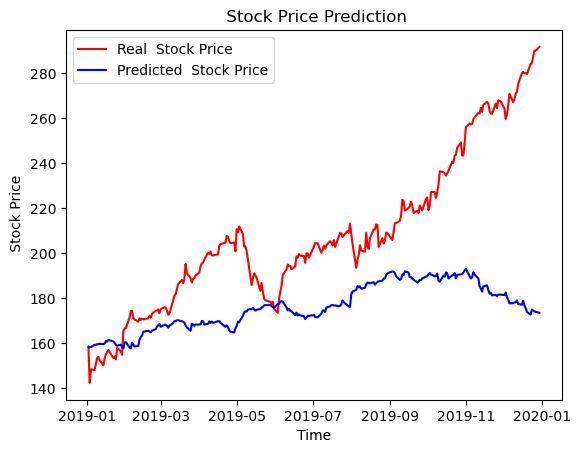

In [ ]:
plt.plot(comp['test'], color = 'red', label = 'Real  Stock Price')
plt.plot(comp['Forecast'], color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Holts method


In [45]:
Train = df2.head(1760)
Test = df2.tail(251)

In [46]:
Train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
1755,2018-12-24,148.149994,151.550003,146.589996,146.830002,143.665421,37169200
1756,2018-12-26,148.300003,157.229996,146.720001,157.169998,153.782547,58582500
1757,2018-12-27,155.839996,156.770004,150.070007,156.149994,152.784531,53117100
1758,2018-12-28,157.500000,158.520004,154.550003,156.229996,152.862808,42291400


In [47]:
Test

,Date,Open,High,Low,Close,Adj Close,Volume
1760,2019-01-02,154.889999,158.850006,154.229996,157.919998,154.516388,37039700
1761,2019-01-03,143.979996,145.720001,142.000000,142.190002,139.125412,91312200
1762,2019-01-04,144.529999,148.550003,143.800003,148.259995,145.064575,58607100
1763,2019-01-07,148.699997,148.830002,145.899994,147.929993,144.741714,54777800
1764,2019-01-08,149.559998,151.820007,148.520004,150.750000,147.500916,41025300
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


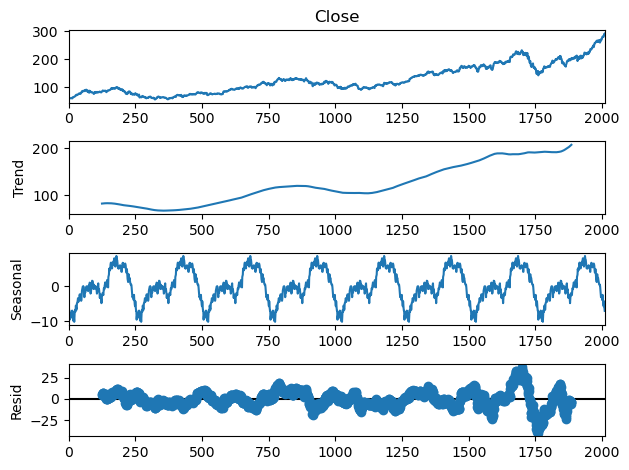

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df2.Close,period= 251)
decompose_ts_add.plot()
plt.show()

C:\Users\91734\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


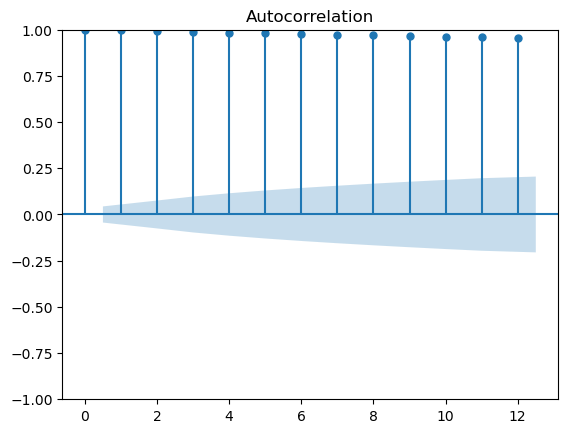

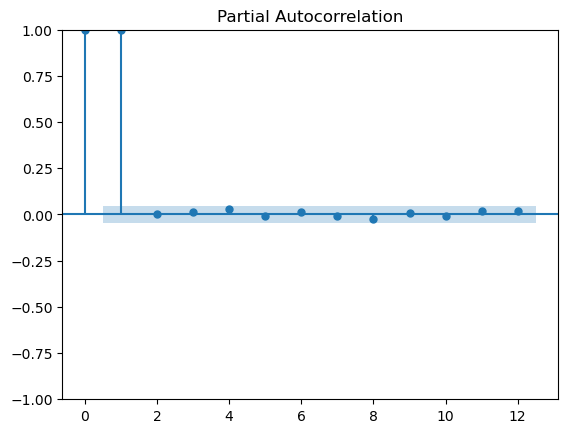

In [49]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df2.Close,lags=12)
tsa_plots.plot_pacf(df2.Close,lags=12)
plt.show()


In [50]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

Simple Exponential Method

In [51]:
ses_model = SimpleExpSmoothing(Train["Close"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Close) 

22.575442886058845

Holt method

In [52]:
# Holt method 
hw_model = Holt(Train["Close"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Close) 

26.32201339547998

Holts winter exponential smoothing with additive seasonality and additive trend

In [53]:
hwe_model_add_add = ExponentialSmoothing(Train["Close"],seasonal="add",trend="add",seasonal_periods=251).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Close) 

C:\Users\91734\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


16.464911714656495

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [54]:
hwe_model_mul_add = ExponentialSmoothing(Train["Close"],seasonal="mul",trend="add",seasonal_periods=251).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Close)

C:\Users\91734\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


13.161680745252019

Final Model by combining train and test

In [55]:
hwe_model_mul_add = ExponentialSmoothing(df2.Close,seasonal="add",trend="add",seasonal_periods=251).fit()

C:\Users\91734\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


PREDICTION

In [56]:
y_pred = hwe_model_mul_add.predict(start=len(Train), end=len(Train)+len(Test)-1)

from sklearn.metrics import mean_squared_error
rmse2 = mean_squared_error(Test['Close'].astype(float), y_pred, squared=False)
rmse2

2.940505861469681

In [57]:
y_pred

1760    157.779670
1761    155.665809
1762    142.985149
1763    148.443372
1764    147.752320
           ...    
2006    279.825306
2007    285.485862
2008    284.214546
2009    289.379001
2010    289.760794
Length: 251, dtype: float64

In [58]:
len(y_pred)

251

In [59]:
comp = pd.DataFrame()
comp['test'] = Test["Close"]
comp['prediction'] = y_pred
comp

,test,prediction
1760,157.919998,157.779670
1761,142.190002,155.665809
1762,148.259995,142.985149
1763,147.929993,148.443372
1764,150.750000,147.752320
...,...,...
2006,284.000000,279.825306
2007,284.269989,285.485862
2008,289.910004,284.214546
2009,289.799988,289.379001


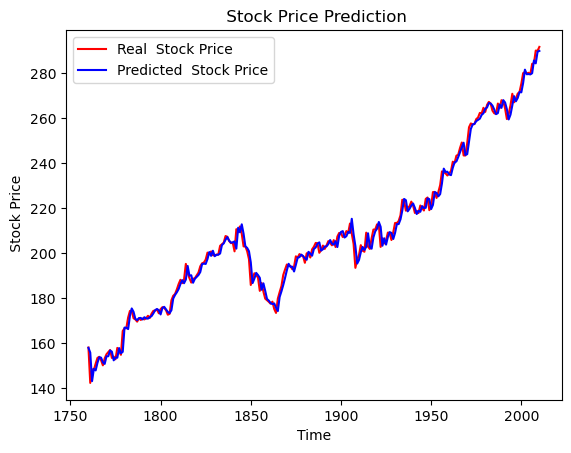

In [60]:
plt.plot(Test["Close"], color = 'red', label = 'Real  Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

Forecast


In [61]:
f = hwe_model_mul_add.forecast(steps=30)
f

2011    291.860642
2012    289.907043
2013    291.040857
2014    291.548013
2015    291.695563
2016    292.398144
2017    292.993441
2018    292.908745
2019    292.296344
2020    293.262811
2021    294.505936
2022    293.926045
2023    294.968863
2024    294.523702
2025    293.765187
2026    293.607023
2027    294.594099
2028    294.810479
2029    294.182928
2030    295.787049
2031    297.590059
2032    298.162588
2033    298.038081
2034    299.006267
2035    300.368139
2036    300.180782
2037    300.183652
2038    300.133433
2039    301.962359
2040    302.415186
dtype: float64

In [62]:
df3 = df[['Close']]
df3['Date'] = df.index
df3.dtypes

C:\Users\91734\AppData\Local\Temp\ipykernel_17360\1772985487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = df.index


Close           float64
Date     datetime64[ns]
dtype: object

In [63]:
df3

,Close,Date
Date,,
2012-01-03,58.747143,2012-01-03
2012-01-04,59.062859,2012-01-04
2012-01-05,59.718571,2012-01-05
2012-01-06,60.342857,2012-01-06
2012-01-09,60.247143,2012-01-09
...,...,...
2019-12-23,284.000000,2019-12-23
2019-12-24,284.269989,2019-12-24
2019-12-26,289.910004,2019-12-26


In [64]:
import pickle

In [65]:
pickle.dump(df3,open('df3.pkl','wb'))